In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('flavor.csv')

In [2]:
data.head()

,annotation_id,annotator,answer,created_at,id,lang,lead_time,name,text,updated_at
0,561,2,smoke\npine,2025-02-01T22:05:51.456011Z,4358,ch,46.185,1975 Chateau Giscours,The “confident ease” of this wine begins to sp...,2025-02-04T21:01:19.198079Z
1,562,2,cedar\nRed Fruit,2025-02-01T22:06:10.304140Z,4359,en,15.305,1975 Chateau Giscours,"92-94 Looks like a 15, actually 45 years Borde...",2025-02-04T21:01:31.178438Z
2,563,2,spices\ntobacco\nplum\nblack current\n,2025-02-01T22:11:19.321628Z,4360,en,320.390,1985 Chateau Cos d'Estournel,"Fully developed, the nose, with its spice box,...",2025-02-04T21:01:45.824597Z
3,564,2,leather\ntobacco\n,2025-02-01T22:12:30.155208Z,4361,ch,38.826,1985 Chateau Cos d'Estournel,The most prominent character of Cos 1985 is th...,2025-02-04T21:02:01.574495Z
4,565,2,truffle\ntobacco\nlicorice\nsmoke\ncedar\nblac...,2025-02-01T22:13:24.439167Z,4362,en,149.550,1985 Chateau Gruaud-Larose,"Fully mature, the seductive nose offers hints ...",2025-02-04T21:02:25.475872Z


In [3]:
# replace none to string
data['answer'] = data['answer'].replace(np.nan, '')
data['answer'] = data['answer'].str.lower()
def string_to_list(string):
    s = string.replace(',', '\n').replace('and', '\n')
    lines = s.split('\n')
    return [line.strip() for line in lines]


data['categories'] = data['answer'].apply(string_to_list)
print(data.shape)
data.drop_duplicates(subset=['text'], inplace=True)
print(data.shape)

(503, 11)
(491, 11)


In [34]:
categories_res = {}
for index, row in data.iterrows():
    categories = row['categories']
    for category in categories:
        if category not in categories_res:
            categories_res[category] = 1
        else:
            categories_res[category] += 1
#sort by value
categories_res = dict(sorted(categories_res.items(), key=lambda item: item[1], reverse=True))
categories_res, len(categories_res)

({'cherry': 99,
  'plum': 98,
  '': 56,
  'blackberry': 54,
  'oak': 50,
  'licorice': 49,
  'tobacco': 48,
  'berry': 42,
  'spice': 42,
  'chocolate': 38,
  'flower': 37,
  'espresso': 34,
  'cassis': 33,
  'red fruit': 32,
  'herb': 28,
  'smoke': 27,
  'cedar': 27,
  'blueberry': 26,
  'black fruit': 22,
  'nougat': 22,
  'orange zest': 20,
  'black currant': 18,
  'mineral': 16,
  'wood': 16,
  'earth': 15,
  'currant': 15,
  'liquorice': 15,
  'cocoa': 15,
  'violet': 15,
  'truffle': 14,
  'graphite': 14,
  'fruit': 14,
  'rose': 13,
  'tobacco leaf': 12,
  'floral': 12,
  'black cherry': 12,
  'raspberry': 11,
  'clove': 11,
  'red currant': 11,
  'flowers': 11,
  'cinnamon': 10,
  'cranberry': 10,
  'cigar box': 9,
  'vanilla': 9,
  'pine': 8,
  'mulberry': 8,
  'mint': 8,
  'earthy': 7,
  'hawthorn': 7,
  'blackcurrant': 6,
  'mocha': 6,
  'caramel': 6,
  'black berry': 6,
  's': 6,
  'coffee bean': 6,
  'honey': 6,
  'pepper': 6,
  'y': 6,
  'peach': 6,
  'prune': 6,
  'ging

In [26]:
# select number > 5
categories_res = {key: value for key, value in categories_res.items() if value > 3}
categories_res, len(categories_res)

({'cherry': 99,
  'plum': 98,
  '': 56,
  'blackberry': 54,
  'oak': 50,
  'licorice': 49,
  'tobacco': 48,
  'berry': 42,
  'spice': 42,
  'chocolate': 38,
  'flower': 37,
  'espresso': 34,
  'cassis': 33,
  'red fruit': 32,
  'herb': 28,
  'smoke': 27,
  'cedar': 27,
  'blueberry': 26,
  'black fruit': 22,
  'nougat': 22,
  'orange zest': 20,
  'black currant': 18,
  'mineral': 16,
  'wood': 16,
  'earth': 15,
  'currant': 15,
  'liquorice': 15,
  'cocoa': 15,
  'violet': 15,
  'truffle': 14,
  'graphite': 14,
  'fruit': 14,
  'rose': 13,
  'tobacco leaf': 12,
  'floral': 12,
  'black cherry': 12,
  'raspberry': 11,
  'clove': 11,
  'red currant': 11,
  'flowers': 11,
  'cinnamon': 10,
  'cranberry': 10,
  'cigar box': 9,
  'vanilla': 9,
  'pine': 8,
  'mulberry': 8,
  'mint': 8,
  'earthy': 7,
  'hawthorn': 7,
  'blackcurrant': 6,
  'mocha': 6,
  'caramel': 6,
  'black berry': 6,
  's': 6,
  'coffee bean': 6,
  'honey': 6,
  'pepper': 6,
  'y': 6,
  'peach': 6,
  'prune': 6,
  'ging

In [22]:
# keep value > 1
categories_res = {key: value for key, value in categories_res.items() if value > 1}
len(categories_res), categories_res

(0, {})

In [6]:
# first category
def convert_to_category(string):
    if 'smoke' in string:
        return 'toasted', 'maturation in oak barrel'
    if 'pine' in string or  'cedar' in string or 'oak' in string:
        return 'woods', 'maturation in oak barrel'

    if 'plum' in string or 'cherry' in string:
        return 'stone fruit', 'fruit'
    
    if 'blackberry' in string or 'black currant' in string or 'raspberry' in string or 'strawberry' in string or 'black current' in string or 'currant' in string or 'blackcurrant' in string or 'blueberry' in string or 'berry' in string or 'cassis' in string:
        return 'red berries', 'fruit'
    
    if 'rose' in string or 'violet' in string:
        return 'colored flowers', 'floral'
    
    if 'flower' in string:
        return 'flowers', 'floral'
    
    if 'leather' in string or 'gravy' in string:
        return 'animal', 'aged red wine'
    
    if 'clove' in string or 'cinnamon' in string or 'vanilla' in string or 'nutmeg' in string or 'pepper' in string or 'liquorice' in string or 'licorice' in string:
        return 'spices', 'maturation in oak barrel'
    
    if 'tar' in string or 'smoke' in string or 'coffee' in string or 'espresso' in string or 'cocoa' in string or 'chocolate' in string or 'cigar' in string:
        return 'toasted', 'maturation in oak barrel'
    
    if 'lemon' in string or 'lime' in string or 'grapefruit' in string:
        return 'citrus', 'fruit'
    
    if 'orange zest' in string or 'apricot' in string:
        return 'botrytis', 'fruit'
    
    if 'pear' in string or 'apple' in string:
        return 'pome fruit', 'fruit'
    
    if 'peach' in string:
        return 'stone fruit', 'fruit'
    
    if 'truffle' in string or 'mushroom' in string or 'earth' in string:
        return 'undergrowth', 'aged red wine'
    
    if 'tobacco' in string or 'hay' in string:
        return 'herbs', 'vegetal'
    
    if 'mint' in string or 'fern' in string or 'dill' in string or 'grass' in string or 'thyme' in string:
        return 'herbs', 'vegetal'
    
    if 'herb' in string:
        return 'herbs', 'vegetal'
        
    
    if 'red fruit' in string:
        return 'red fruit', 'fruit'
    
    if 'black fruit' in string:
        return 'black fruit', 'fruit'
    
    if 'fruit' in string:
        return 'fruit', 'fruit'
    
    if 'wood' in string:
        return 'woods', 'maturation in oak barrel'
    
    if 'spice' in string:
        return 'spices', 'maturation in oak barrel'
    
    
    return None, None

In [7]:
# remove whether it appear in convert_to_category
keys_to_remove = [key for key in categories_res.keys() if convert_to_category(key) is not None]

for key in keys_to_remove:
    del categories_res[key]
len(categories_res), categories_res

(0, {})

In [8]:
data

,annotation_id,annotator,answer,created_at,id,lang,lead_time,name,text,updated_at,categories
0,561,2,smoke\npine,2025-02-01T22:05:51.456011Z,4358,ch,46.185,1975 Chateau Giscours,The “confident ease” of this wine begins to sp...,2025-02-04T21:01:19.198079Z,"[smoke, pine]"
1,562,2,cedar\nred fruit,2025-02-01T22:06:10.304140Z,4359,en,15.305,1975 Chateau Giscours,"92-94 Looks like a 15, actually 45 years Borde...",2025-02-04T21:01:31.178438Z,"[cedar, red fruit]"
2,563,2,spices\ntobacco\nplum\nblack current\n,2025-02-01T22:11:19.321628Z,4360,en,320.390,1985 Chateau Cos d'Estournel,"Fully developed, the nose, with its spice box,...",2025-02-04T21:01:45.824597Z,"[spices, tobacco, plum, black current, ]"
3,564,2,leather\ntobacco\n,2025-02-01T22:12:30.155208Z,4361,ch,38.826,1985 Chateau Cos d'Estournel,The most prominent character of Cos 1985 is th...,2025-02-04T21:02:01.574495Z,"[leather, tobacco, ]"
4,565,2,truffle\ntobacco\nlicorice\nsmoke\ncedar\nblac...,2025-02-01T22:13:24.439167Z,4362,en,149.550,1985 Chateau Gruaud-Larose,"Fully mature, the seductive nose offers hints ...",2025-02-04T21:02:25.475872Z,"[truffle, tobacco, licorice, smoke, cedar, bla..."
...,...,...,...,...,...,...,...,...,...,...,...
498,1061,2,plum\nblackberry\nchocolate\nincense\nherb\nro...,2025-02-05T00:39:25.801126Z,4868,en,26.571,2021 Chateau La Violette,Open and with a distinctly Mediterranean profi...,2025-02-05T00:39:25.801150Z,"[plum, blackberry, chocolate, incense, herb, r..."
499,1062,2,"cinnamon, fennel, kumquat, and jackfruit\nsich...",2025-02-05T00:39:51.768300Z,4869,ch,20.023,2021 Chateau Lafaurie-Peyraguey,Lafaurie-Peyraguey boasts a surprisingly great...,2025-02-05T00:39:51.768315Z,"[cinnamon, fennel, kumquat, , jackfruit, sichu..."
500,1063,2,honey\nwood\nvanilla,2025-02-05T00:40:36.848599Z,4870,en,28.231,2021 Chateau Lafaurie-Peyraguey,"Light greenish yellow, silver reflections. An ...",2025-02-05T00:40:36.848624Z,"[honey, wood, vanilla]"
501,1064,2,"honey, with flower, orange, lemon curd, vanil...",2025-02-05T00:40:55.916334Z,4871,en,18.269,2021 Chateau Lafaurie-Peyraguey,"Yellow tropical fruits dipped in honey, with f...",2025-02-05T00:40:55.916354Z,"[honey, with flower, orange, lemon curd, vanil..."


In [9]:
# 确保新列存在，并设置 dtype 为 object 以存储 list
data['category_1'] = [[] for _ in range(len(data))]
data['category_2'] = [[] for _ in range(len(data))]

for index, row in data.iterrows():
    categories = row['categories']
    category_1, category_2 = [], []
    
    for i in categories:
        cat_1, cat_2 = convert_to_category(i)
        if cat_1 is not None:
            category_1.append(cat_1)
            category_2.append(cat_2)

    # 直接存入 list，Pandas 需要 object 类型列
    data.at[index, 'category_1'] = category_1
    data.at[index, 'category_2'] = category_2


In [10]:
data

,annotation_id,annotator,answer,created_at,id,lang,lead_time,name,text,updated_at,categories,category_1,category_2
0,561,2,smoke\npine,2025-02-01T22:05:51.456011Z,4358,ch,46.185,1975 Chateau Giscours,The “confident ease” of this wine begins to sp...,2025-02-04T21:01:19.198079Z,"[smoke, pine]","[toasted, woods]","[maturation in oak barrel, maturation in oak b..."
1,562,2,cedar\nred fruit,2025-02-01T22:06:10.304140Z,4359,en,15.305,1975 Chateau Giscours,"92-94 Looks like a 15, actually 45 years Borde...",2025-02-04T21:01:31.178438Z,"[cedar, red fruit]","[woods, red fruit]","[maturation in oak barrel, fruit]"
2,563,2,spices\ntobacco\nplum\nblack current\n,2025-02-01T22:11:19.321628Z,4360,en,320.390,1985 Chateau Cos d'Estournel,"Fully developed, the nose, with its spice box,...",2025-02-04T21:01:45.824597Z,"[spices, tobacco, plum, black current, ]","[spices, herbs, stone fruit, red berries]","[maturation in oak barrel, vegetal, fruit, fruit]"
3,564,2,leather\ntobacco\n,2025-02-01T22:12:30.155208Z,4361,ch,38.826,1985 Chateau Cos d'Estournel,The most prominent character of Cos 1985 is th...,2025-02-04T21:02:01.574495Z,"[leather, tobacco, ]","[animal, herbs]","[aged red wine, vegetal]"
4,565,2,truffle\ntobacco\nlicorice\nsmoke\ncedar\nblac...,2025-02-01T22:13:24.439167Z,4362,en,149.550,1985 Chateau Gruaud-Larose,"Fully mature, the seductive nose offers hints ...",2025-02-04T21:02:25.475872Z,"[truffle, tobacco, licorice, smoke, cedar, bla...","[undergrowth, herbs, spices, toasted, woods, r...","[aged red wine, vegetal, maturation in oak bar..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,1061,2,plum\nblackberry\nchocolate\nincense\nherb\nro...,2025-02-05T00:39:25.801126Z,4868,en,26.571,2021 Chateau La Violette,Open and with a distinctly Mediterranean profi...,2025-02-05T00:39:25.801150Z,"[plum, blackberry, chocolate, incense, herb, r...","[stone fruit, red berries, toasted, herbs, col...","[fruit, fruit, maturation in oak barrel, veget..."
499,1062,2,"cinnamon, fennel, kumquat, and jackfruit\nsich...",2025-02-05T00:39:51.768300Z,4869,ch,20.023,2021 Chateau Lafaurie-Peyraguey,Lafaurie-Peyraguey boasts a surprisingly great...,2025-02-05T00:39:51.768315Z,"[cinnamon, fennel, kumquat, , jackfruit, sichu...","[spices, fruit, spices]","[maturation in oak barrel, fruit, maturation i..."
500,1063,2,honey\nwood\nvanilla,2025-02-05T00:40:36.848599Z,4870,en,28.231,2021 Chateau Lafaurie-Peyraguey,"Light greenish yellow, silver reflections. An ...",2025-02-05T00:40:36.848624Z,"[honey, wood, vanilla]","[woods, spices]","[maturation in oak barrel, maturation in oak b..."
501,1064,2,"honey, with flower, orange, lemon curd, vanil...",2025-02-05T00:40:55.916334Z,4871,en,18.269,2021 Chateau Lafaurie-Peyraguey,"Yellow tropical fruits dipped in honey, with f...",2025-02-05T00:40:55.916354Z,"[honey, with flower, orange, lemon curd, vanil...","[flowers, citrus, spices]","[floral, fruit, maturation in oak barrel]"


In [17]:
from itertools import combinations
import pandas as pd

# 确保 category_1 中的列表去重
data['category_1'] = data['category_1'].apply(lambda x: list(set(x)) if isinstance(x, list) else [])
data['category_2'] = data['category_2'].apply(lambda x: list(set(x)) if isinstance(x, list) else [])

# 存储 Jaccard 结果的字典
group_avg_jaccard = {}

# 按名字分组
grouped = data.groupby('name')

for name, group in grouped:
    indices = group.index.tolist()
    category_lists = group['category_2'].tolist()  # 计算 category_1 的 Jaccard 相似度

    jaccard_values = []
    
    # 计算组内 Jaccard 相似度
    for (cat1, cat2) in combinations(category_lists, 2):
        set1, set2 = set(cat1), set(cat2)  # **去重**
        if set1 and set2:
            jaccard_sim = len(set1 & set2) / len(set1 | set2)
        else:
            jaccard_sim = 0  # 避免空集问题
        
        jaccard_values.append(jaccard_sim)
    
    # 计算该组的平均 Jaccard 相似度
    avg_jaccard = sum(jaccard_values) / len(jaccard_values) if jaccard_values else 0
    group_avg_jaccard[name] = avg_jaccard

# 将平均 Jaccard 相似度存入 DataFrame
data['avg_jaccard_similarity'] = data['name'].map(group_avg_jaccard)



In [18]:
data['avg_jaccard_similarity'].mean()

0.4044014482914687

In [19]:
data

,annotation_id,annotator,answer,created_at,id,lang,lead_time,name,text,updated_at,categories,category_1,category_2,avg_jaccard_similarity,avg_en_jaccard_similarity,avg_ch_en_jaccard_similarity
0,561,2,smoke\npine,2025-02-01T22:05:51.456011Z,4358,ch,46.185,1975 Chateau Giscours,The “confident ease” of this wine begins to sp...,2025-02-04T21:01:19.198079Z,"[smoke, pine]","[toasted, woods]",[maturation in oak barrel],0.500000,0.000000,0.333333
1,562,2,cedar\nred fruit,2025-02-01T22:06:10.304140Z,4359,en,15.305,1975 Chateau Giscours,"92-94 Looks like a 15, actually 45 years Borde...",2025-02-04T21:01:31.178438Z,"[cedar, red fruit]","[red fruit, woods]","[maturation in oak barrel, fruit]",0.500000,0.000000,0.333333
2,563,2,spices\ntobacco\nplum\nblack current\n,2025-02-01T22:11:19.321628Z,4360,en,320.390,1985 Chateau Cos d'Estournel,"Fully developed, the nose, with its spice box,...",2025-02-04T21:01:45.824597Z,"[spices, tobacco, plum, black current, ]","[herbs, spices, red berries, stone fruit]","[maturation in oak barrel, fruit, vegetal]",0.250000,0.000000,0.200000
3,564,2,leather\ntobacco\n,2025-02-01T22:12:30.155208Z,4361,ch,38.826,1985 Chateau Cos d'Estournel,The most prominent character of Cos 1985 is th...,2025-02-04T21:02:01.574495Z,"[leather, tobacco, ]","[herbs, animal]","[vegetal, aged red wine]",0.250000,0.000000,0.200000
4,565,2,truffle\ntobacco\nlicorice\nsmoke\ncedar\nblac...,2025-02-01T22:13:24.439167Z,4362,en,149.550,1985 Chateau Gruaud-Larose,"Fully mature, the seductive nose offers hints ...",2025-02-04T21:02:25.475872Z,"[truffle, tobacco, licorice, smoke, cedar, bla...","[red berries, spices, undergrowth, toasted, he...","[maturation in oak barrel, fruit, aged red win...",0.250000,0.333333,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,1061,2,plum\nblackberry\nchocolate\nincense\nherb\nro...,2025-02-05T00:39:25.801126Z,4868,en,26.571,2021 Chateau La Violette,Open and with a distinctly Mediterranean profi...,2025-02-05T00:39:25.801150Z,"[plum, blackberry, chocolate, incense, herb, r...","[red berries, stone fruit, colored flowers, to...","[maturation in oak barrel, fruit, floral, vege...",0.533333,0.250000,0.333333
499,1062,2,"cinnamon, fennel, kumquat, and jackfruit\nsich...",2025-02-05T00:39:51.768300Z,4869,ch,20.023,2021 Chateau Lafaurie-Peyraguey,Lafaurie-Peyraguey boasts a surprisingly great...,2025-02-05T00:39:51.768315Z,"[cinnamon, fennel, kumquat, , jackfruit, sichu...","[spices, fruit]","[maturation in oak barrel, fruit]",0.611111,0.233333,0.194444
500,1063,2,honey\nwood\nvanilla,2025-02-05T00:40:36.848599Z,4870,en,28.231,2021 Chateau Lafaurie-Peyraguey,"Light greenish yellow, silver reflections. An ...",2025-02-05T00:40:36.848624Z,"[honey, wood, vanilla]","[spices, woods]",[maturation in oak barrel],0.611111,0.233333,0.194444
501,1064,2,"honey, with flower, orange, lemon curd, vanil...",2025-02-05T00:40:55.916334Z,4871,en,18.269,2021 Chateau Lafaurie-Peyraguey,"Yellow tropical fruits dipped in honey, with f...",2025-02-05T00:40:55.916354Z,"[honey, with flower, orange, lemon curd, vanil...","[flowers, citrus, spices]","[maturation in oak barrel, fruit, floral]",0.611111,0.233333,0.194444


In [21]:
from itertools import combinations
import pandas as pd

# 确保 category_1 去重
data['category_1'] = data['category_1'].apply(lambda x: list(set(x)) if isinstance(x, list) else [])
data['category_2'] = data['category_2'].apply(lambda x: list(set(x)) if isinstance(x, list) else [])

# 存储 Jaccard 结果的字典
group_jaccard_en = {}  # en 内部相似度
group_jaccard_ch_en = {}  # ch 和 en 之间的相似度

# 按名字分组
grouped = data.groupby('name')

for name, group in grouped:
    # 按 lang 分类
    en_group = group[group['lang'] == 'en']
    ch_group = group[group['lang'] == 'ch']
    
    en_indices = en_group.index.tolist()
    ch_indices = ch_group.index.tolist()
    
    en_category_lists = en_group['category_2'].tolist()
    ch_category_lists = ch_group['category_2'].tolist()  # ch 只有 1 条数据

    # 计算英文内部相似度
    en_jaccard_values = []
    for (cat1, cat2) in combinations(en_category_lists, 2):
        set1, set2 = set(cat1), set(cat2)
        if set1 and set2:
            jaccard_sim = len(set1 & set2) / len(set1 | set2)
        else:
            jaccard_sim = 0
        en_jaccard_values.append(jaccard_sim)

    avg_en_jaccard = sum(en_jaccard_values) / len(en_jaccard_values) if en_jaccard_values else 0
    group_jaccard_en[name] = avg_en_jaccard

    # 计算 ch 和 en 之间的相似度
    ch_en_jaccard_values = []
    if ch_category_lists and en_category_lists:
        ch_set = set(ch_category_lists[0])  # 只有一条
        for en_cat in en_category_lists:
            en_set = set(en_cat)
            if ch_set and en_set:
                jaccard_sim = len(ch_set & en_set) / len(ch_set | en_set)
            else:
                jaccard_sim = 0
            ch_en_jaccard_values.append(jaccard_sim)

    avg_ch_en_jaccard = sum(ch_en_jaccard_values) / len(ch_en_jaccard_values) if ch_en_jaccard_values else 0
    group_jaccard_ch_en[name] = avg_ch_en_jaccard

# 将结果存入 DataFrame
data['avg_en_jaccard_similarity'] = data['name'].map(group_jaccard_en)
data['avg_ch_en_jaccard_similarity'] = data['name'].map(group_jaccard_ch_en)

data['avg_en_jaccard_similarity'].mean(), data['avg_ch_en_jaccard_similarity'].mean()


(0.3380629101606698, 0.3713679565512559)

In [30]:
import json
def read_json(file_name):
    with open(file_name, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

en_data = read_json('../data/merge_data_language.json')

In [40]:
cn_reviews = []
en_reviews = []
for key, value in en_data.items():
    Western_reviews = value['Western_reviews']
    Chinese_reviews = value['Chinese reviews']
    for review in Chinese_reviews:
        if review['English review'] is not None:
            cn_reviews.append(review['English review'])
    for review in Western_reviews:
        language = review['language']
        if language == 'en':
            en_reviews.append(review['review'])

In [41]:
cn_reviews_count = {}
en_reviews_count = {}

for review in cn_reviews:
    review = review.lower()
    for word in categories_res.keys():
        if word in review:
            if word not in cn_reviews_count:
                cn_reviews_count[word] = 1
            else:
                cn_reviews_count[word] += 1

In [42]:
cn_reviews_count

{'': 3227,
 'black fruit': 111,
 'fruit': 1186,
 'rose': 213,
 's': 3227,
 'y': 3220,
 'rosemary': 27,
 'c': 3227,
 'basil': 11,
 'm': 3213,
 'black fruits': 96,
 'er': 3185,
 'herb': 291,
 'graphite': 174,
 'herbs': 26,
 'cherry': 330,
 'flower': 470,
 'flowers': 287,
 'stone': 544,
 'lime': 306,
 'cherr': 455,
 'acidity': 748,
 'clay': 268,
 'peony': 34,
 'soil': 292,
 'red fruit': 57,
 'ink': 342,
 'red fruits': 43,
 'fruity': 184,
 'petal': 56,
 'eucalyptus': 54,
 'truffle': 97,
 'olive': 40,
 'oak': 440,
 'jujube': 63,
 'wood': 102,
 'hawthorn': 88,
 'alwood': 46,
 'date': 85,
 'red date': 22,
 'sea': 155,
 'salt': 228,
 'herbal': 112,
 'blackberry': 279,
 'berry': 858,
 'plum': 491,
 'mineral': 716,
 'minerality': 211,
 'plu': 537,
 'sour plum': 56,
 'orange': 140,
 'lemon': 72,
 'chalk': 105,
 'black tea': 62,
 'chalky': 82,
 'spice': 597,
 'floral': 256,
 'spices': 550,
 'clove': 145,
 'cream': 393,
 'almond': 96,
 'tar': 362,
 'amomum': 13,
 'iris': 26,
 'violet': 375,
 'plums

In [46]:
for review in en_reviews:
    review = review.lower()
    for word in categories_res.keys():
        if word in review:
            if word not in en_reviews_count:
                en_reviews_count[word] = 1
            else:
                en_reviews_count[word] += 1
en_reviews_count

{'cherry': 2661,
 '': 16746,
 'chocolate': 2339,
 's': 16746,
 'y': 16588,
 'ink': 5253,
 'c': 16724,
 'm': 16571,
 'cherr': 4393,
 'er': 16160,
 'oak': 3376,
 'berry': 4268,
 'spice': 3145,
 'flower': 1230,
 'licorice': 1547,
 'espresso': 796,
 'clove': 308,
 'cranberry': 142,
 'coffee': 930,
 'tar': 1419,
 'acidity': 3400,
 'red cherry': 163,
 'coffe': 930,
 'cori': 1581,
 'soil': 177,
 'red fruit': 1391,
 'fruit': 11336,
 'flowers': 1143,
 'plu': 4011,
 'plum': 3617,
 'blackberry': 1660,
 'fruity': 621,
 'blueberry': 498,
 'mineral': 1764,
 'leather': 531,
 'stone': 462,
 'cigar': 551,
 'creme': 87,
 'earth': 1833,
 'strawberry': 168,
 'cocoa': 798,
 'coco': 919,
 'flint': 34,
 'meat': 808,
 'leaf': 1208,
 'raspberry': 646,
 'jam': 506,
 'black cherry': 796,
 'cinnamon': 244,
 'pepper': 962,
 'spices': 917,
 'black raspberry': 139,
 'cassis': 2440,
 'cigar box': 311,
 'black tea': 107,
 'currant': 2544,
 'cream': 857,
 'currants': 922,
 'creamy': 715,
 'pencil': 408,
 'caramel': 188

In [94]:
cn_reviews_count_5 = {key: value for key, value in cn_reviews_count.items() if value > 50}
en_reviews_count_5 = {key: value for key, value in en_reviews_count.items() if value > 50}

In [95]:
cn_reviews_count_5, len(cn_reviews_count_5)

({'': 3227,
  'black fruit': 111,
  'fruit': 1186,
  'rose': 213,
  's': 3227,
  'y': 3220,
  'c': 3227,
  'm': 3213,
  'black fruits': 96,
  'er': 3185,
  'herb': 291,
  'graphite': 174,
  'cherry': 330,
  'flower': 470,
  'flowers': 287,
  'stone': 544,
  'lime': 306,
  'cherr': 455,
  'acidity': 748,
  'clay': 268,
  'soil': 292,
  'red fruit': 57,
  'ink': 342,
  'fruity': 184,
  'petal': 56,
  'eucalyptus': 54,
  'truffle': 97,
  'oak': 440,
  'jujube': 63,
  'wood': 102,
  'hawthorn': 88,
  'date': 85,
  'sea': 155,
  'salt': 228,
  'herbal': 112,
  'blackberry': 279,
  'berry': 858,
  'plum': 491,
  'mineral': 716,
  'minerality': 211,
  'plu': 537,
  'sour plum': 56,
  'orange': 140,
  'lemon': 72,
  'chalk': 105,
  'black tea': 62,
  'chalky': 82,
  'spice': 597,
  'floral': 256,
  'spices': 550,
  'clove': 145,
  'cream': 393,
  'almond': 96,
  'tar': 362,
  'violet': 375,
  'plums': 107,
  'milk': 84,
  'licorice': 152,
  'prune': 84,
  'cori': 153,
  'star anise': 63,
  'an

In [96]:
en_reviews_count_5, len(en_reviews_count_5)

({'cherry': 2661,
  '': 16746,
  'chocolate': 2339,
  's': 16746,
  'y': 16588,
  'ink': 5253,
  'c': 16724,
  'm': 16571,
  'cherr': 4393,
  'er': 16160,
  'oak': 3376,
  'berry': 4268,
  'spice': 3145,
  'flower': 1230,
  'licorice': 1547,
  'espresso': 796,
  'clove': 308,
  'cranberry': 142,
  'coffee': 930,
  'tar': 1419,
  'acidity': 3400,
  'red cherry': 163,
  'coffe': 930,
  'cori': 1581,
  'soil': 177,
  'red fruit': 1391,
  'fruit': 11336,
  'flowers': 1143,
  'plu': 4011,
  'plum': 3617,
  'blackberry': 1660,
  'fruity': 621,
  'blueberry': 498,
  'mineral': 1764,
  'leather': 531,
  'stone': 462,
  'cigar': 551,
  'creme': 87,
  'earth': 1833,
  'strawberry': 168,
  'cocoa': 798,
  'coco': 919,
  'meat': 808,
  'leaf': 1208,
  'raspberry': 646,
  'jam': 506,
  'black cherry': 796,
  'cinnamon': 244,
  'pepper': 962,
  'spices': 917,
  'black raspberry': 139,
  'cassis': 2440,
  'cigar box': 311,
  'black tea': 107,
  'currant': 2544,
  'cream': 857,
  'currants': 922,
  'c

In [97]:
sort_en = dict(sorted(en_reviews_count_5.items(), key=lambda item: item[1], reverse=True))
sort_cn = dict(sorted(cn_reviews_count_5.items(), key=lambda item: item[1], reverse=True))

sort_en

{'': 16746,
 's': 16746,
 'c': 16724,
 'y': 16588,
 'm': 16571,
 'er': 16160,
 'fruit': 11336,
 'ink': 5253,
 'cherr': 4393,
 'berry': 4268,
 'plu': 4011,
 'plum': 3617,
 'acidity': 3400,
 'oak': 3376,
 'spice': 3145,
 'cherry': 2661,
 'currant': 2544,
 'cassis': 2440,
 'tobacco': 2381,
 'chocolate': 2339,
 'cedar': 2004,
 'earth': 1833,
 'mineral': 1764,
 'blackberry': 1660,
 'herb': 1652,
 'black fruit': 1639,
 'cori': 1581,
 'licorice': 1547,
 'wood': 1432,
 'tar': 1419,
 'red fruit': 1391,
 'floral': 1313,
 'plums': 1271,
 'flower': 1230,
 'leaf': 1208,
 'vanilla': 1203,
 'spicy': 1149,
 'flowers': 1143,
 'black fruits': 993,
 'pepper': 962,
 'smoke': 959,
 'orange': 953,
 'dark fruit': 940,
 'violet': 939,
 'coffee': 930,
 'coffe': 930,
 'currants': 922,
 'coco': 919,
 'spices': 917,
 'earthy': 893,
 'mint': 889,
 'red fruits': 861,
 'cream': 857,
 'blackcurrant': 829,
 'meat': 808,
 'cocoa': 798,
 'espresso': 796,
 'black cherry': 796,
 'herbs': 717,
 'herbal': 716,
 'creamy': 71

In [103]:
# first category
labels = ['smoke', 'pine', 'cedar', 'oak', 'plum', 'cherry', 'blackberry', 'black currant', 'raspberry', 'strawberry', 'black current', 'currant', 'blackcurrant', 'blueberry', 'berry', 'cassis', 'rose', 'violet', 'flower', 'leather', 'gravy', 'clove', 'cinnamon', 'vanilla', 'nutmeg', 'pepper', 'liquorice', 'licorice', 'tar', 'smoke', 'coffee', 'espresso', 'cocoa', 'chocolate', 'cigar', 'coco', 'mocha', 'lemon', 'lime', 'grapefruit', 'orange zest', 'apricot', 'tangerine zest', 'pear', 'apple', 'peach', 'date', 'jujube', 'truffle', 'mushroom', 'earth', 'soil', 'gravel', 'forest floor', 'underbrush', 'tobacco', 'hay', 'mint', 'fern', 'dill', 'grass', 'thyme', 'herb', 'red fruit', 'black fruit', 'fruit', 'wood', 'spice', 'spicy', 'mineral', 'stone', 'orange', 'citrus', 'floral', 'petal', 'meat', 'leather', 'grave', 'leaf', 'cream', 'creme', 'graphite','ink', 'honeysuckle', 'hawthorn', 'linden', 'jasmine', 'acacia', 'almond', 'coconut', 'hazelnut', 'nut']
def convert_to_category(string):
    if 'smoke' in string:
        return 'toasted', 'maturation in oak barrel'
    if 'pine' in string or  'cedar' in string or 'oak' in string:
        return 'woods', 'maturation in oak barrel'

    if 'plum' in string or 'cherry' in string:
        return 'stone fruit', 'fruit'
    
    if 'blackberry' in string or 'black currant' in string or 'raspberry' in string or 'strawberry' in string or 'black current' in string or 'currant' in string or 'blackcurrant' in string or 'blueberry' in string or 'berry' in string or 'cassis' in string:
        return 'red berries', 'fruit'
    
    if 'rose' in string or 'violet' in string:
        return 'colored flowers', 'floral'
    
    if 'flower' in string:
        return 'flowers', 'floral'
    
    if 'leather' in string or 'gravy' in string:
        return 'animal', 'aged red wine'
    
    if 'clove' in string or 'cinnamon' in string or 'vanilla' in string or 'nutmeg' in string or 'pepper' in string or 'liquorice' in string or 'licorice' in string:
        return 'spices', 'maturation in oak barrel'
    
    if 'tar' in string or 'smoke' in string or 'coffee' in string or 'espresso' in string or 'cocoa' in string or 'chocolate' in string or 'cigar' in string or 'coco' in string or 'mocha' in string:
        return 'toasted', 'maturation in oak barrel'
    
    if 'lemon' in string or 'lime' in string or 'grapefruit' in string:
        return 'citrus', 'fruit'
    
    if 'orange zest' in string or 'apricot' in string or 'tangerine zest' in string:
        return 'botrytis', 'fruit'
    
    if 'pear' in string or 'apple' in string:
        return 'pome fruit', 'fruit'
    
    if 'peach' in string or 'date' in string or 'jujube' in string:
        return 'stone fruit', 'fruit'
    
    if 'truffle' in string or 'mushroom' in string or 'earth' in string or 'soil' in string or 'gravel' in string or 'forest floor' in string or 'underbrush' in string:
        return 'undergrowth', 'aged red wine'
    
    if 'tobacco' in string or 'hay' in string:
        return 'herbs', 'vegetal'
    
    if 'mint' in string or 'fern' in string or 'dill' in string or 'grass' in string or 'thyme' in string:
        return 'herbs', 'vegetal'
    
    if 'herb' in string:
        return 'herbs', 'vegetal'
        
    
    if 'red fruit' in string:
        return 'red fruit', 'fruit'
    
    if 'black fruit' in string:
        return 'black fruit', 'fruit'
    
    if 'fruit' in string:
        return 'fruit', 'fruit'
    
    if 'wood' in string:
        return 'woods', 'maturation in oak barrel'
    
    if 'spice' in string or 'spicy' in string:
        return 'spices', 'maturation in oak barrel'
    
    if 'mineral' in string or 'stone' in string:
        return 'mineral', 'mineral'
    
    if 'orange' in string or 'citrus' in string:
        return 'botrytized', 'fruit'
    
    if 'floral' in string or 'petal' in string:
        return 'floral', 'floral'
    
    if 'meat' in string or 'leather' in string or 'grave' in string:
        return 'animal', 'aged red wine'
    
    if 'leaf' in string:
        return 'leaves', 'vegetal'
    
    if 'cream' in string or 'creme' in string:
        return 'yeast', 'yeast'
    
    if 'graphite' in string or 'ink' in string:
        return 'mineral', 'mineral'
    
    if 'honeysuckle' in string or 'hawthorn' in string or 'linden' in string or 'jasmine' in string or 'acacia' in string:
        return 'white flowers', 'floral'
    
    if 'almond' in string or 'coconut' or 'hazelnut' in string or 'nut' in string:
        return 'nuts', 'maturation in oak barrel'
    
    return None, None

len(labels)

92

In [170]:
count_reviews = {}
reviews = []
levels_1, levels_2, levels_3 = [], [], []
en_data = read_json('../data/merge_data_language_en.json')
for key, value in en_data.items():
    Western_reviews = value['Western_reviews']
    Chinese_reviews = value['Chinese reviews']
    if Chinese_reviews[0]['English review'] is None or len(Western_reviews) == 0:
        continue
    else:
        level1_cn, level2_cn, level3_cn = [], [], []
        levels1_en, levels2_en, levels3_en = [], [], []
        reviews_cn, reviews_en = [], []
        for r in Chinese_reviews:
            review = r['English review'].lower()
            reviews_cn.append(review)
            for word in labels:
                if word in review:
                    level1_cn.append(word)
                    level2_cn.append(convert_to_category(word)[0])
                    level3_cn.append(convert_to_category(word)[1])
            
        for r in Western_reviews:
            level1_en, level2_en, level3_en = [], [], []
            language = r['language']
            if language != 'en':
                continue
            review = r['review'].lower()
            if review in reviews_en:
                continue
            reviews_en.append(review)
            for word in labels:
                if word in review:
                    level1_en.append(word)
                    level2_en.append(convert_to_category(word)[0])
                    level3_en.append(convert_to_category(word)[1])
            levels1_en.append(level1_en)
            levels2_en.append(level2_en)
            levels3_en.append(level3_en)
        levels_1.append([level1_cn, levels1_en])
        levels_2.append([level2_cn, levels2_en])
        levels_3.append([level3_cn, levels3_en])
        reviews.append([reviews_cn, reviews_en])
                    
        
    
            
            
    

In [171]:
# calculate Jaccard similarity
def jaccard_similarity(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    if not set1 and not set2:
        return 0
    return len(set1 & set2) / len(set1 | set2)

In [188]:
# levels_1
level1_Jaccard, level2_Jaccard, level3_Jaccard = [], [], []
level1_mean, level2_mean, level3_mean = [], [], []
for i in range(len(levels_1)):
    cn = levels_1[i][0]
    ens = levels_1[i][1]
    jaccard = []
    if len(ens) == 0:
        continue
    for en in ens:
        level1_Jaccard.append(jaccard_similarity(cn, en))
        jaccard.append(jaccard_similarity(cn, en))
    level1_mean.append(np.array(jaccard).mean())

for i in range(len(levels_2)):
    cn = levels_2[i][0]
    ens = levels_2[i][1]
    jaccard = []
    if len(ens) == 0:
        continue
    for en in ens:
        level2_Jaccard.append(jaccard_similarity(cn, en))
        jaccard.append(jaccard_similarity(cn, en))
    level2_mean.append(np.array(jaccard).mean())

for i in range(len(levels_3)):
    cn = levels_3[i][0]
    ens = levels_3[i][1]
    jaccard = []
    if len(ens) == 0:
        continue
    for en in ens:
        level3_Jaccard.append(jaccard_similarity(cn, en))
        jaccard.append(jaccard_similarity(cn, en))
    level3_mean.append(np.array(jaccard).mean())
    # for en in ens:
    #     jaccard.append(jaccard_similarity(cn, en))
    
# average
import numpy as np
np.array(level1_Jaccard).mean(), np.array(level2_Jaccard).mean(), np.array(level3_Jaccard).mean()


(0.08469831683840416, 0.1895679588790109, 0.4033237767837787)

In [189]:
import itertools
tmp = []
level1_Jaccard_inner, level2_Jaccard_inner, level3_Jaccard_inner = [], [], []
level1_inner_mean, level2_inner_mean, level3_inner_mean = [], [], []
for i in range(len(levels_1)):
    ens = levels_1[i][1]
    if len(ens) < 2:
        continue
    tmp.append(ens)
    jaccard = []
    for pair in itertools.combinations(ens, 2):
        level1_Jaccard_inner.append(jaccard_similarity(pair[0], pair[1]))
        jaccard.append(jaccard_similarity(pair[0], pair[1]))
    level1_inner_mean.append(np.array(jaccard).mean())

for i in range(len(levels_2)):
    ens = levels_2[i][1]
    if len(ens) < 2:
        continue
    jaccard = []
    for pair in itertools.combinations(ens, 2):
        level2_Jaccard_inner.append(jaccard_similarity(pair[0], pair[1]))
        jaccard.append(jaccard_similarity(pair[0], pair[1]))
    level2_inner_mean.append(np.array(jaccard).mean())

for i in range(len(levels_3)):
    ens = levels_3[i][1]
    if len(ens) < 2:
        continue
    jaccard = []
    for pair in itertools.combinations(ens, 2):
        level3_Jaccard_inner.append(jaccard_similarity(pair[0], pair[1]))
        jaccard.append(jaccard_similarity(pair[0], pair[1]))
    level3_inner_mean.append(np.array(jaccard).mean())
        
# average
np.array(level1_Jaccard_inner).mean(), np.array(level2_Jaccard_inner).mean(), np.array(level3_Jaccard_inner).mean()

(0.13444497720968374, 0.24878796312091825, 0.4760114657669225)

In [169]:
tmp[1]

[['cherry',
  'cassis',
  'vanilla',
  'mocha',
  'orange zest',
  'date',
  'fruit',
  'wood',
  'mineral',
  'orange',
  'cherry',
  'fruit',
  'ink'],
 ['cherry',
  'cassis',
  'vanilla',
  'mocha',
  'orange zest',
  'date',
  'fruit',
  'wood',
  'mineral',
  'orange',
  'cherry',
  'fruit',
  'ink']]

In [180]:
for i in levels_2:
    if len(i[1]) < 2:
        continue
    else:
        print(i)
        break

[['woods', 'stone fruit', 'fruit', 'mineral'], [['herbs', 'fruit', 'spices', 'animal'], ['red berries', 'red berries', 'animal', 'toasted', 'fruit', 'animal'], ['stone fruit', 'stone fruit', 'red berries', 'herbs', 'herbs', 'herbs', 'fruit', 'spices', 'mineral']]]


In [194]:
def bootstrap_ci(data, n_iter=1000, alpha=0.05):
    means = []
    for _ in range(n_iter):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))  # or whatever metric

    lower = np.percentile(means, 100 * alpha / 2)
    upper = np.percentile(means, 100 * (1 - alpha / 2))
    return lower, upper, np.mean(data)  # 原始均值

from scipy.stats import wilcoxon

level1_mean, level2_mean, level3_mean = np.array(level1_mean), np.array(level2_mean), np.array(level3_mean)
level1_inner_mean, level2_inner_mean, level3_inner_mean = np.array(level1_inner_mean), np.array(level2_inner_mean), np.array(level3_inner_mean)

print(bootstrap_ci(level1_mean))
print(bootstrap_ci(level2_mean))
print(bootstrap_ci(level3_mean))

print(bootstrap_ci(level1_inner_mean))
print(bootstrap_ci(level2_inner_mean))
print(bootstrap_ci(level3_inner_mean))




(0.07829520316893546, 0.08427849033374117, 0.08128328086083475)
(0.17758163685251402, 0.18703038661484145, 0.18230460382195532)
(0.3876708262943152, 0.40258868356193867, 0.3951049609721309)
(0.12050446891524964, 0.12725981439069137, 0.12397356990315135)
(0.23117105716436345, 0.24095529154022377, 0.23597764002005833)
(0.45522671853398294, 0.4705511523303271, 0.46302354226988457)


In [204]:
def bootstrap_mean_diff(x, y, n_iter=10000, alpha=0.05):
    rng   = np.random.default_rng(2025)
    diffs = []
    for _ in range(n_iter):
        xb = rng.choice(x, size=len(x), replace=True)
        yb = rng.choice(y, size=len(y), replace=True)
        diffs.append(np.mean(xb) - np.mean(yb))
    lo, hi = np.percentile(diffs, [100*alpha/2, 100*(1-alpha/2)])
    return np.mean(x) - np.mean(y), lo, hi

print(bootstrap_mean_diff(level1_mean, level1_inner_mean))
print(bootstrap_mean_diff(level2_mean, level2_inner_mean))
print(bootstrap_mean_diff(level3_mean, level3_inner_mean))

(-0.04510832146825677, -0.04959611228697469, -0.0406359836385193)
(-0.06114039814659997, -0.06804572253003062, -0.05415779248244666)
(-0.07899540195326288, -0.08972759949248134, -0.06822219095286328)


In [196]:
import itertools
tmp = []
level1_Jaccard_inner, level2_Jaccard_inner, level3_Jaccard_inner = [], [], []
level1_inner_mean, level2_inner_mean, level3_inner_mean = [], [], []
level1_mean, level2_mean, level3_mean = [], [], []
for i in range(len(levels_1)):
    ens = levels_1[i][1]
    cn = levels_1[i][0]
    if len(ens) < 2:
        continue
    tmp.append(ens)
    jaccard_inner, jaccard_outer = [], []
    for en in ens:
        jaccard_outer.append(jaccard_similarity(cn, en))
    level1_mean.append(np.array(jaccard_outer).mean())
    for pair in itertools.combinations(ens, 2):
        level1_Jaccard_inner.append(jaccard_similarity(pair[0], pair[1]))
        jaccard_inner.append(jaccard_similarity(pair[0], pair[1]))
    level1_inner_mean.append(np.array(jaccard_inner).mean())

for i in range(len(levels_2)):
    ens = levels_2[i][1]
    cn = levels_2[i][0]
    if len(ens) < 2:
        continue
    jaccard_inner, jaccard_outer = [], []
    for en in ens:
        jaccard_outer.append(jaccard_similarity(cn, en))
    level2_mean.append(np.array(jaccard_outer).mean())
    for pair in itertools.combinations(ens, 2):
        level2_Jaccard_inner.append(jaccard_similarity(pair[0], pair[1]))
        jaccard_inner.append(jaccard_similarity(pair[0], pair[1]))
    level2_inner_mean.append(np.array(jaccard_inner).mean())

for i in range(len(levels_3)):
    ens = levels_3[i][1]
    cn = levels_3[i][0]
    if len(ens) < 2:
        continue
    jaccard_inner, jaccard_outer = [], []
    for en in ens:
        jaccard_outer.append(jaccard_similarity(cn, en))
    level3_mean.append(np.array(jaccard_outer).mean())
    for pair in itertools.combinations(ens, 2):
        level3_Jaccard_inner.append(jaccard_similarity(pair[0], pair[1]))
        jaccard_inner.append(jaccard_similarity(pair[0], pair[1]))
    level3_inner_mean.append(np.array(jaccard_inner).mean())
        
# average
np.array(level1_Jaccard_inner).mean(), np.array(level2_Jaccard_inner).mean(), np.array(level3_Jaccard_inner).mean()

(0.13444497720968374, 0.24878796312091825, 0.4760114657669225)

In [202]:
print(wilcoxon(np.array(level1_mean), np.array(level1_inner_mean)))
# print(wilcoxon(np.array(level2_mean), np.array(level2_inner_mean)))
# print(wilcoxon(np.array(level3_mean), np.array(level3_inner_mean)))
print(wilcoxon(np.array(level1_mean), np.array(level1_inner_mean)))
print(np.array(level1_mean).mean(), np.array(level1_mean).std(), np.array(level1_inner_mean).mean(), np.array(level1_inner_mean).std())

WilcoxonResult(statistic=564153.0, pvalue=5.46068450200505e-86)
0.07886524843489458 0.07002105098186065 0.12397356990315135 0.08169227063686399


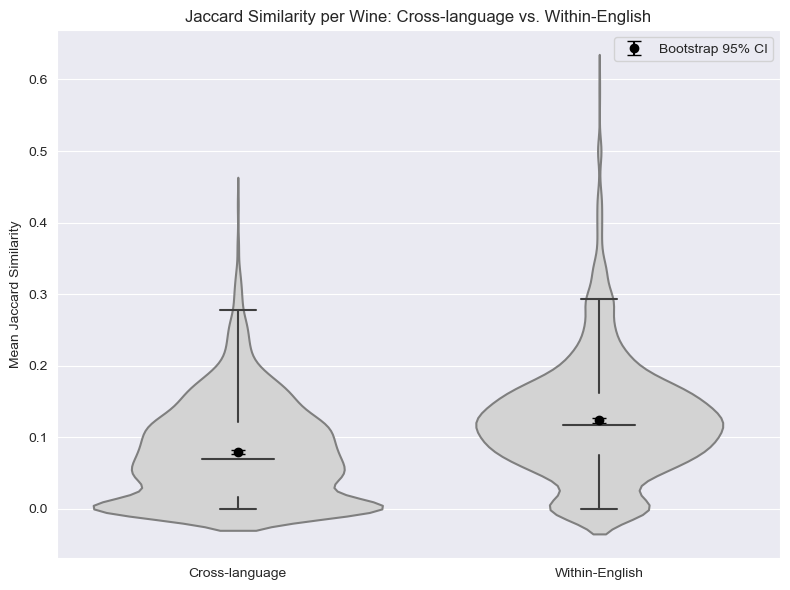

<Figure size 640x480 with 0 Axes>

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设你已有两个 list：
zh_en_means = level1_mean
en_en_means = level1_inner_mean

# 合并成 DataFrame 方便 seaborn 作图
data = pd.DataFrame({
    'Jaccard': zh_en_means + en_en_means,
    'Group': ['Cross-language'] * len(zh_en_means) + ['Within-English'] * len(en_en_means)
})

# Bootstrap 函数
def bootstrap_ci(data, n_iter=2000, alpha=0.05):
    boot_means = []
    for _ in range(n_iter):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    lower = np.percentile(boot_means, 100 * alpha / 2)
    upper = np.percentile(boot_means, 100 * (1 - alpha / 2))
    return np.mean(data), lower, upper

# 分别计算 bootstrap CI
means, lowers, uppers = [], [], []
for group_name in ['Cross-language', 'Within-English']:
    group_data = data[data['Group'] == group_name]['Jaccard'].values
    mean, lower, upper = bootstrap_ci(group_data)
    means.append(mean)
    lowers.append(lower)
    uppers.append(upper)

# 绘图
plt.figure(figsize=(8, 6))
sns.violinplot(x='Group', y='Jaccard', data=data, inner=None, color='lightgray')
sns.boxplot(x='Group', y='Jaccard', data=data, width=0.2, showcaps=True, 
            boxprops={'facecolor': 'white'}, showfliers=False)

# 添加误差条 (error bars for bootstrap CI)
for i, (mean, lower, upper) in enumerate(zip(means, lowers, uppers)):
    plt.errorbar(i, mean, yerr=[[mean - lower], [upper - mean]], fmt='o', 
                 color='black', capsize=5, label='Bootstrap 95% CI' if i == 0 else "")

plt.title("Jaccard Similarity per Wine: Cross-language vs. Within-English")
plt.ylabel("Mean Jaccard Similarity")
plt.xlabel("")
plt.legend()
plt.tight_layout()
plt.show()

# save svg
plt.savefig('jaccard.svg', format='svg')